In [1]:
# Import libreries fot data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('clean_salary_data.csv')

# Show the first few rows of the dataset
df.head()

,work_year,job_title,salary_in_usd,employee_residence,company_location,job_category,experience_level_desc,employment_type_desc,work_setting,company_size_desc,...,economic_period,adjusted_salary,salary_to_experience_ratio,normalized_salary,total_compensation_estimate,work_life_balance,automation_risk,company_sector,salary_bracket,salary_competitiveness
0,2023,Principal Data Scientist,85847,ES,ES,Senior Data Scientist,Senior,Full-time,Remote,Large,...,Post-Pandemic,114462.666667,28615.666667,55744.805195,103016.4,3.0,3.5,Services,Low,Below Average
1,2023,ML Engineer,30000,US,US,ML Engineer,Mid-Level,Contract,Remote,Small,...,Post-Pandemic,30000.000000,15000.000000,30000.000000,36000.0,3.5,3.0,Startup/Tech,Low,Below Average
2,2023,ML Engineer,25500,US,US,ML Engineer,Mid-Level,Contract,Remote,Small,...,Post-Pandemic,25500.000000,12750.000000,25500.000000,30600.0,3.5,3.0,Startup/Tech,Low,Below Average
3,2023,Data Scientist,175000,CA,CA,Data Scientist,Senior,Full-time,Remote,Medium,...,Post-Pandemic,184210.526316,58333.333333,125000.000000,213500.0,3.0,4.0,Mixed,Medium-High,Competitive
4,2023,Data Scientist,120000,CA,CA,Data Scientist,Senior,Full-time,Remote,Medium,...,Post-Pandemic,126315.789474,40000.000000,85714.285714,146400.0,3.0,4.0,Mixed,Medium-Low,Below Average


In [3]:
# Show the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   work_year                    3755 non-null   int64  
 1   job_title                    3755 non-null   object 
 2   salary_in_usd                3755 non-null   int64  
 3   employee_residence           3755 non-null   object 
 4   company_location             3755 non-null   object 
 5   job_category                 3755 non-null   object 
 6   experience_level_desc        3755 non-null   object 
 7   employment_type_desc         3755 non-null   object 
 8   work_setting                 3755 non-null   object 
 9   company_size_desc            3755 non-null   object 
 10  region                       3755 non-null   object 
 11  residence_region             3755 non-null   object 
 12  domestic_employment          3755 non-null   bool   
 13  cost_of_living_ind

In [4]:
# Configurar el estilo visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [5]:
# Paletas personalizadas
palette1 = sns.color_palette("viridis", 10)
palette2 = sns.color_palette("magma", 10)
palette3 = sns.color_palette("mako", 8)
palette4 = sns.color_palette("flare", 6)

In [6]:
# Función para formatear salarios en miles o millones
def format_salary(x, pos):
    if x >= 1000000:
        return f'${x/1000000:.1f}M'
    else:
        return f'${x/1000:.0f}K'

salary_formatter = FuncFormatter(format_salary)

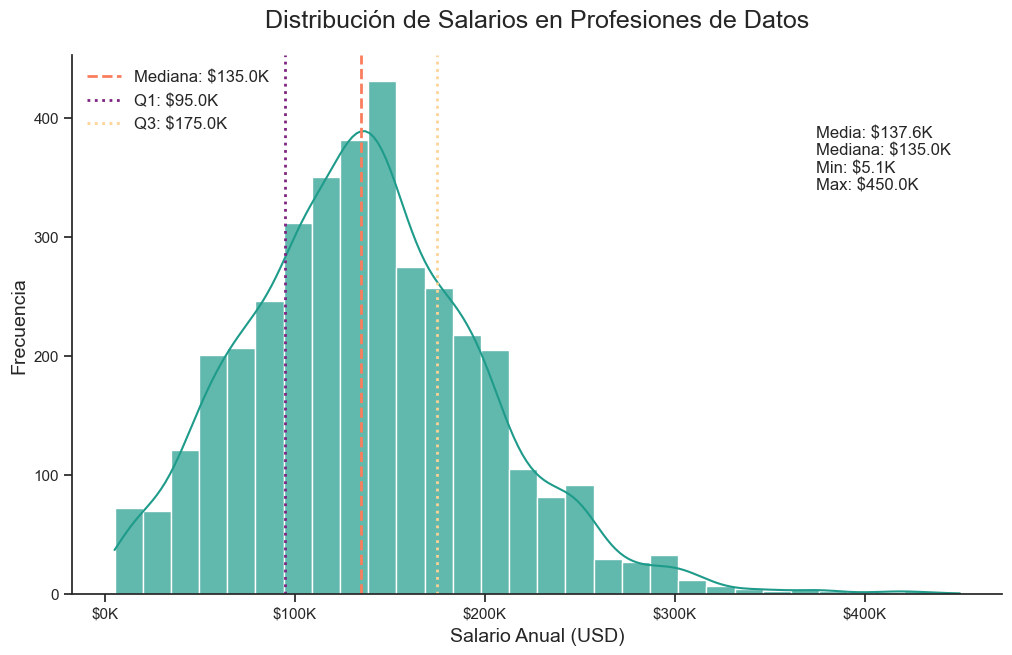

In [7]:
# -----------------------
# 1. Distribución de salarios con densidad y estadísticas
# -----------------------
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color=palette1[5], alpha=0.7, ax=ax)

# Añadir líneas verticales para mediana y cuartiles
median = df['salary_in_usd'].median()
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)

ax.axvline(median, color=palette2[7], linestyle='--', linewidth=2, 
           label=f'Mediana: ${median/1000:.1f}K')
ax.axvline(q1, color=palette2[3], linestyle=':', linewidth=2, 
           label=f'Q1: ${q1/1000:.1f}K')
ax.axvline(q3, color=palette2[9], linestyle=':', linewidth=2, 
           label=f'Q3: ${q3/1000:.1f}K')

ax.set_title('Distribución de Salarios en Profesiones de Datos', fontsize=18, pad=20)
ax.set_xlabel('Salario Anual (USD)', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
ax.xaxis.set_major_formatter(salary_formatter)
ax.legend(fontsize=12)

# Añadir estadísticas como texto
stats_text = (f"Media: ${df['salary_in_usd'].mean()/1000:.1f}K\n"
              f"Mediana: ${median/1000:.1f}K\n"
              f"Min: ${df['salary_in_usd'].min()/1000:.1f}K\n"
              f"Max: ${df['salary_in_usd'].max()/1000:.1f}K")
               
ax.text(0.80, 0.75, stats_text, transform=ax.transAxes, 
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'), fontsize=12)

plt.show()

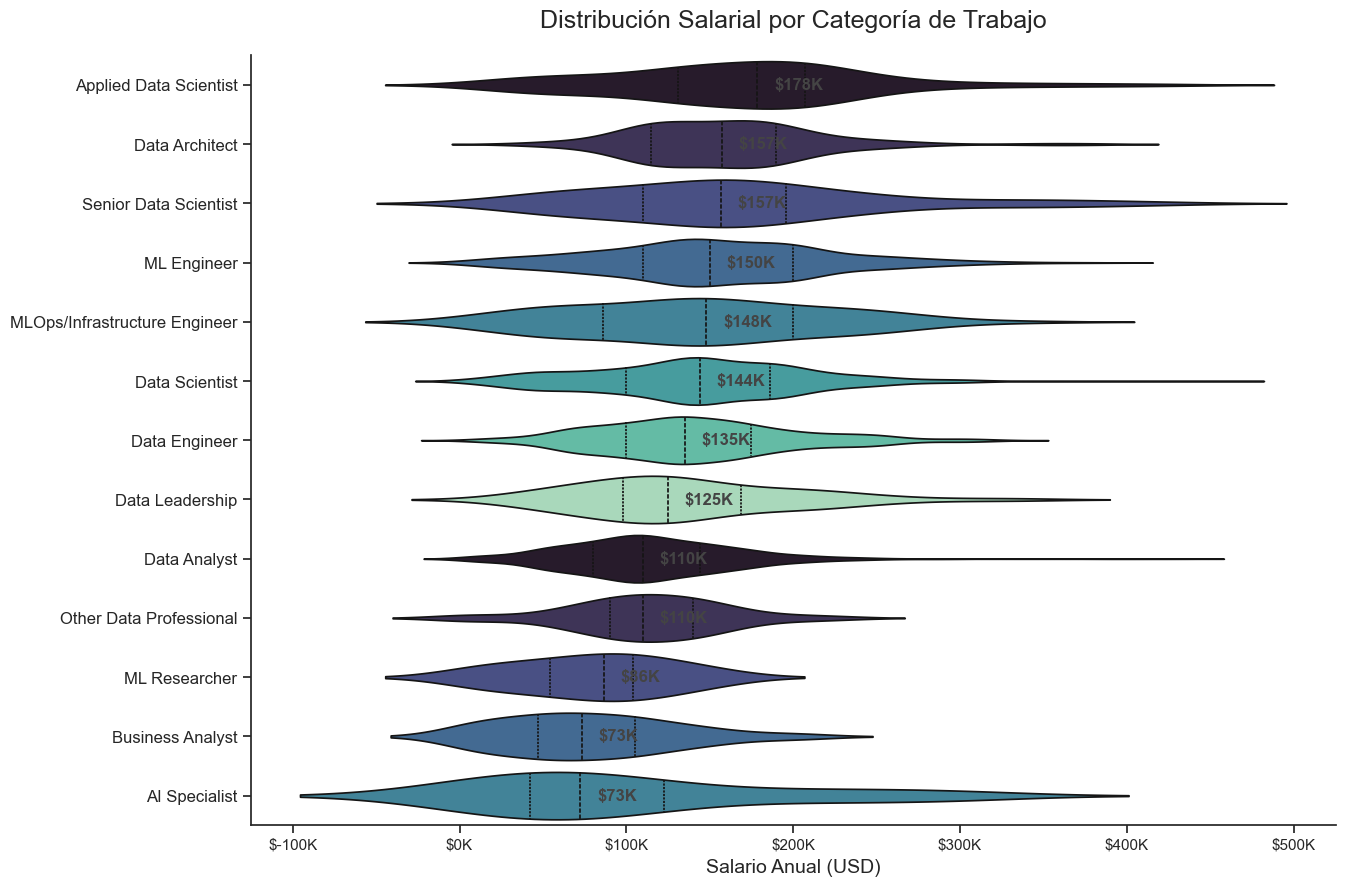

In [8]:
# -----------------------
# 2. Salarios por categoría de trabajo - Gráfico de violín
# -----------------------
fig, ax = plt.subplots(figsize=(14, 10))

# Ordenar por mediana de salario
job_order = df.groupby('job_category')['salary_in_usd'].median().sort_values(ascending=False).index

sns.violinplot(x='salary_in_usd', y='job_category', data=df, order=job_order, 
               palette=palette3, inner="quartile", orient='h', ax=ax)

# Añadir mediana como texto en cada violín
for i, cat in enumerate(job_order):
    median_value = df[df['job_category'] == cat]['salary_in_usd'].median()
    ax.text(median_value + 10000, i, f"${median_value/1000:.0f}K", 
            va='center', fontweight='bold', color='#444444')

ax.set_title('Distribución Salarial por Categoría de Trabajo', fontsize=18, pad=20)
ax.set_xlabel('Salario Anual (USD)', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(salary_formatter)
ax.tick_params(axis='y', labelsize=12)

plt.show()

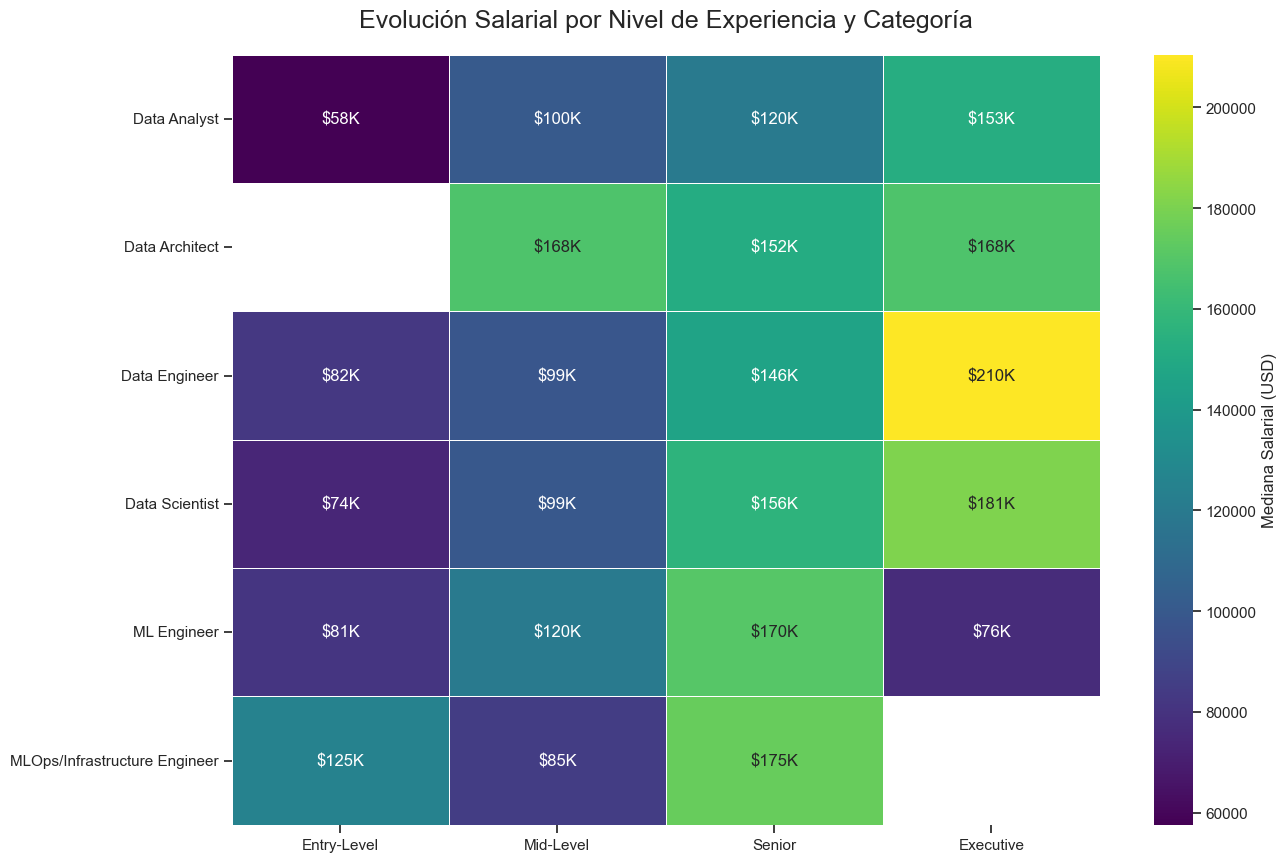

In [9]:
# -----------------------
# 3. Evolución salarial por nivel de experiencia y categoría
# -----------------------
fig, ax = plt.subplots(figsize=(14, 10))

# Filtrar solo las categorías principales
top_categories = df['job_category'].value_counts().nlargest(6).index
filtered_df = df[df['job_category'].isin(top_categories)]

# Asegurar que el orden de experiencia sea correcto
exp_order = ['Entry-Level', 'Mid-Level', 'Senior', 'Executive']

# Agrupar y calcular medianas
pivot_data = filtered_df.groupby(['job_category', 'experience_level_desc'])['salary_in_usd'].median().reset_index()
pivot_data = pivot_data.pivot(index='job_category', columns='experience_level_desc', values='salary_in_usd')
pivot_data = pivot_data.reindex(columns=exp_order)

# Crear el heatmap
sns.heatmap(pivot_data, annot=True, cmap='viridis', fmt='.0f', linewidths=.5, ax=ax,
            annot_kws={"size": 12}, cbar_kws={'label': 'Mediana Salarial (USD)'})

# Formatear anotaciones con K para mil
for text in ax.texts:
    text.set_text(f"${int(text.get_text())/1000:.0f}K")

ax.set_title('Evolución Salarial por Nivel de Experiencia y Categoría', fontsize=18, pad=20)
ax.set_ylabel('')
ax.set_xlabel('')

plt.show()

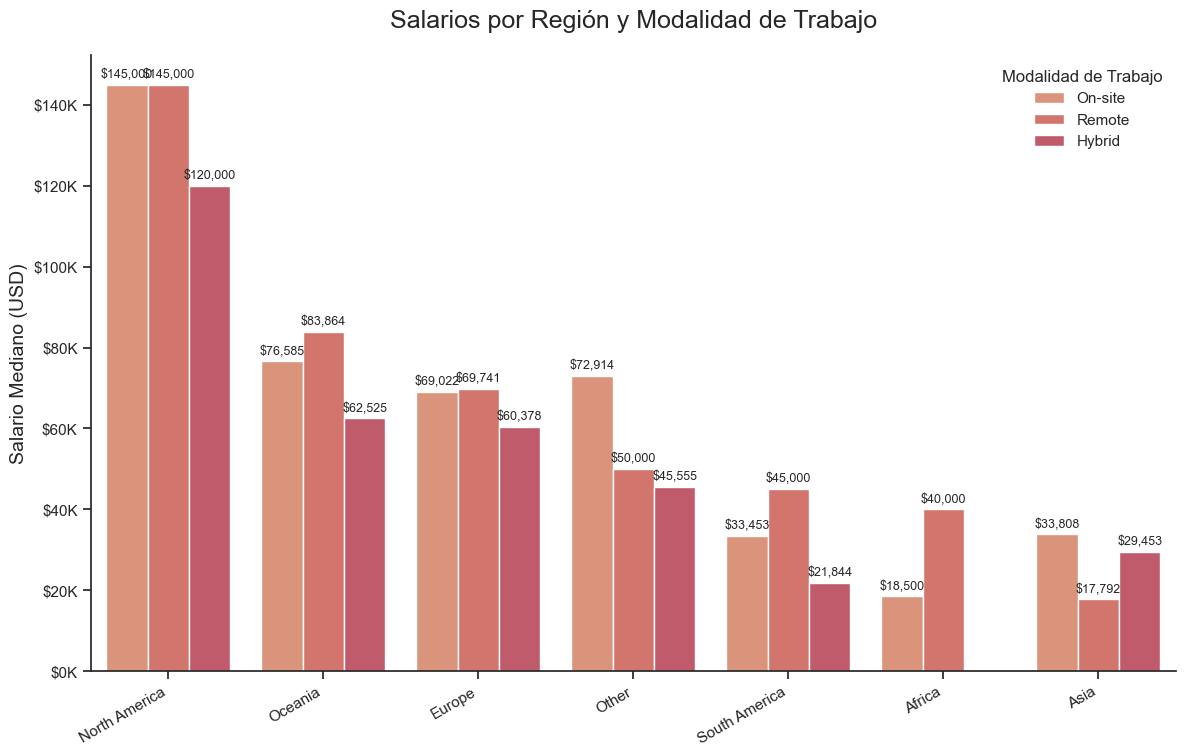

In [10]:
# -----------------------
# 4. Salarios por región y remoto vs presencial (CORREGIDO)
# -----------------------
fig, ax = plt.subplots(figsize=(14, 8))

# Agrupar por región y configuración de trabajo
region_work_salary = df.groupby(['region', 'work_setting'])['salary_in_usd'].median().reset_index()
region_order = df.groupby('region')['salary_in_usd'].median().sort_values(ascending=False).index

# Crear gráfico agrupado
g = sns.barplot(x='region', y='salary_in_usd', hue='work_setting', data=region_work_salary, 
                palette=palette4, order=region_order, ax=ax)

# Añadir etiquetas de valor (CORREGIDO)
for container in ax.containers:
    labels = [f"${int(v):,}" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=9)

ax.set_title('Salarios por Región y Modalidad de Trabajo', fontsize=18, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)
ax.legend(title='Modalidad de Trabajo')
plt.xticks(rotation=30, ha='right')

plt.show()

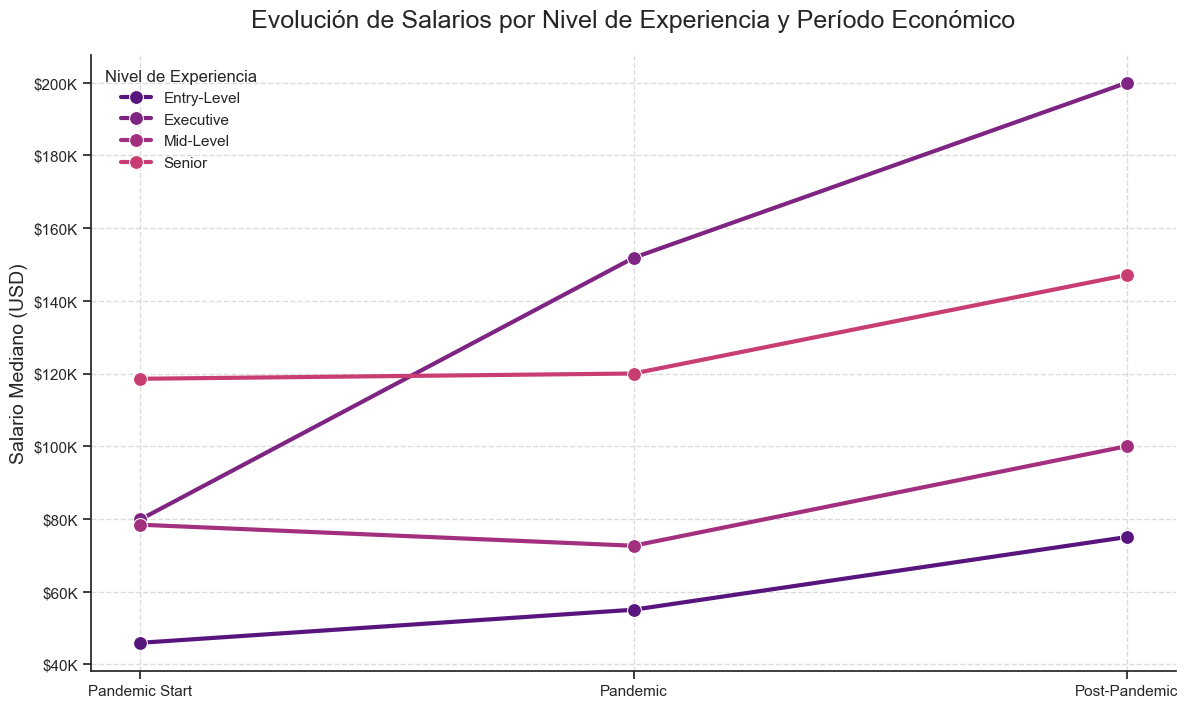

In [11]:
# -----------------------
# 5. Tendencia de salario por nivel de experiencia y período económico
# -----------------------
fig, ax = plt.subplots(figsize=(14, 8))

# Agrupar por período y experiencia
period_exp_salary = df.groupby(['economic_period', 'experience_level_desc'])['salary_in_usd'].median().reset_index()

# Definir orden correcto para períodos
period_order = ['Pre-Pandemic', 'Pandemic Start', 'Pandemic', 'Post-Pandemic']
period_exp_salary['economic_period'] = pd.Categorical(
    period_exp_salary['economic_period'], 
    categories=period_order, 
    ordered=True
)
period_exp_salary = period_exp_salary.sort_values('economic_period')

# Crear gráfico de líneas
sns.lineplot(x='economic_period', y='salary_in_usd', hue='experience_level_desc', 
            data=period_exp_salary, palette=palette2[2:], marker='o', markersize=10, 
            linewidth=3, ax=ax)

# Mejorar apariencia
ax.set_title('Evolución de Salarios por Nivel de Experiencia y Período Económico', fontsize=18, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)
ax.legend(title='Nivel de Experiencia', title_fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

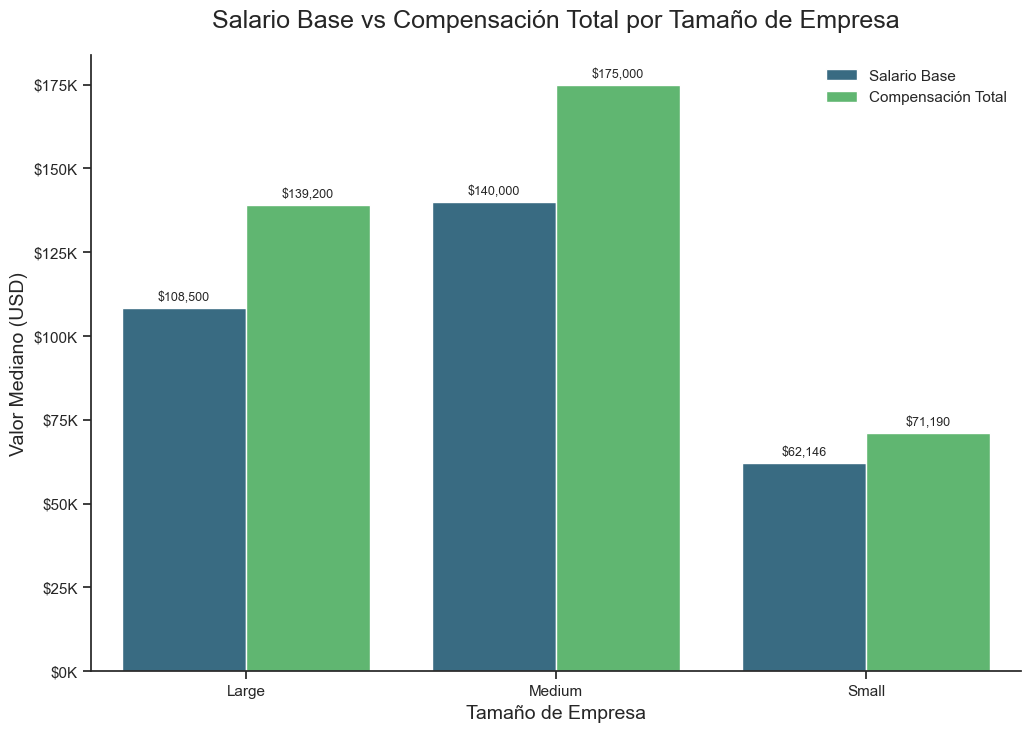

In [12]:
# -----------------------
# 6. Comparativa de salario base vs compensación total por tamaño de empresa
# -----------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Calcular mediana de salario y compensación total por tamaño
comp_size_df = df.groupby('company_size_desc')[['salary_in_usd', 'total_compensation_estimate']].median().reset_index()
comp_size_df = comp_size_df.melt(id_vars='company_size_desc', 
                              value_vars=['salary_in_usd', 'total_compensation_estimate'],
                              var_name='Tipo', value_name='Valor')

# Renombrar para mejor visualización
comp_size_df['Tipo'] = comp_size_df['Tipo'].map({
    'salary_in_usd': 'Salario Base', 
    'total_compensation_estimate': 'Compensación Total'
})

# Crear gráfico
sns.barplot(x='company_size_desc', y='Valor', hue='Tipo', data=comp_size_df, 
            palette=[palette1[3], palette1[7]], ax=ax)

# Añadir etiquetas de valor
for container in ax.containers:
    labels = [f"${int(v):,}" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=9)

ax.set_title('Salario Base vs Compensación Total por Tamaño de Empresa', fontsize=18, pad=20)
ax.set_xlabel('Tamaño de Empresa', fontsize=14)
ax.set_ylabel('Valor Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)
ax.legend(title='')

plt.show()

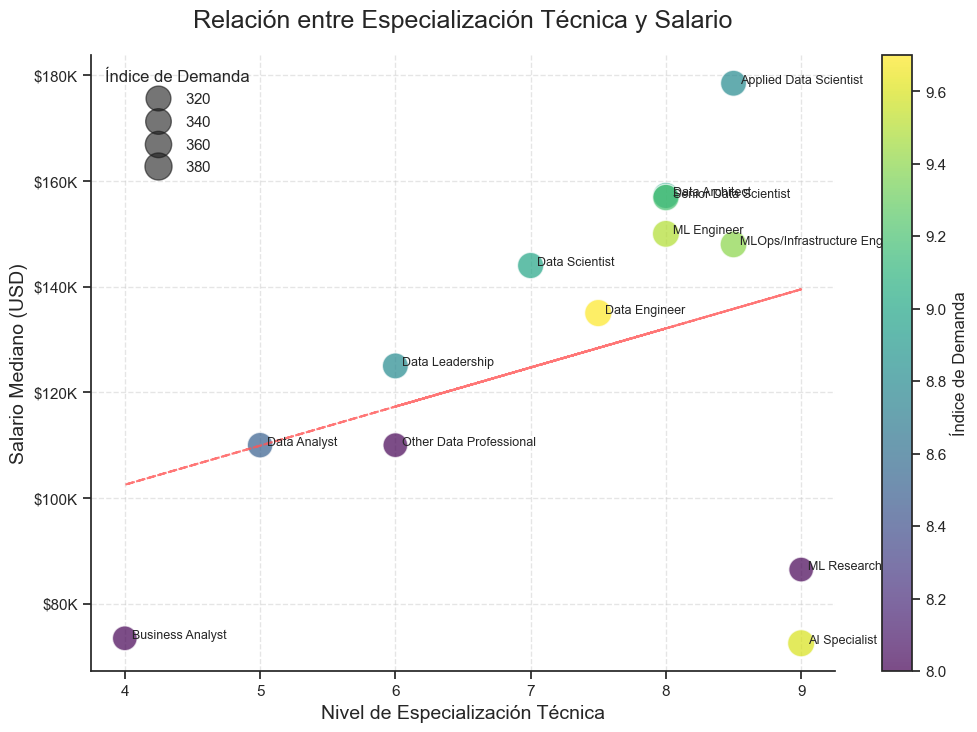

In [13]:
# -----------------------
# 7. Relación entre especialización técnica y salario
# -----------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Preparar datos
scatter_data = df.groupby('job_category').agg({
    'tech_specialization': 'mean',
    'salary_in_usd': 'median',
    'demand_index': 'mean'
}).reset_index()

# Usar tamaño para representar demanda
scatter = ax.scatter(scatter_data['tech_specialization'], scatter_data['salary_in_usd'], 
                     s=scatter_data['demand_index']*40, 
                     c=scatter_data['demand_index'], cmap='viridis',
                     alpha=0.7, edgecolors='white', linewidths=1)

# Añadir nombres de categorías
for i, row in scatter_data.iterrows():
    ax.annotate(row['job_category'], 
                (row['tech_specialization']+0.05, row['salary_in_usd']), 
                fontsize=9)

# Añadir línea de tendencia
z = np.polyfit(scatter_data['tech_specialization'], scatter_data['salary_in_usd'], 1)
p = np.poly1d(z)
ax.plot(scatter_data['tech_specialization'], p(scatter_data['tech_specialization']), 
        linestyle='--', color='#FF5555', alpha=0.8)

# Leyenda para el tamaño
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=4)
legend = ax.legend(handles, labels, loc="upper left", title="Índice de Demanda")

ax.set_title('Relación entre Especialización Técnica y Salario', fontsize=18, pad=20)
ax.set_xlabel('Nivel de Especialización Técnica', fontsize=14)
ax.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)
ax.grid(True, linestyle='--', alpha=0.5)

# Añadir barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Índice de Demanda', fontsize=12)

plt.show()

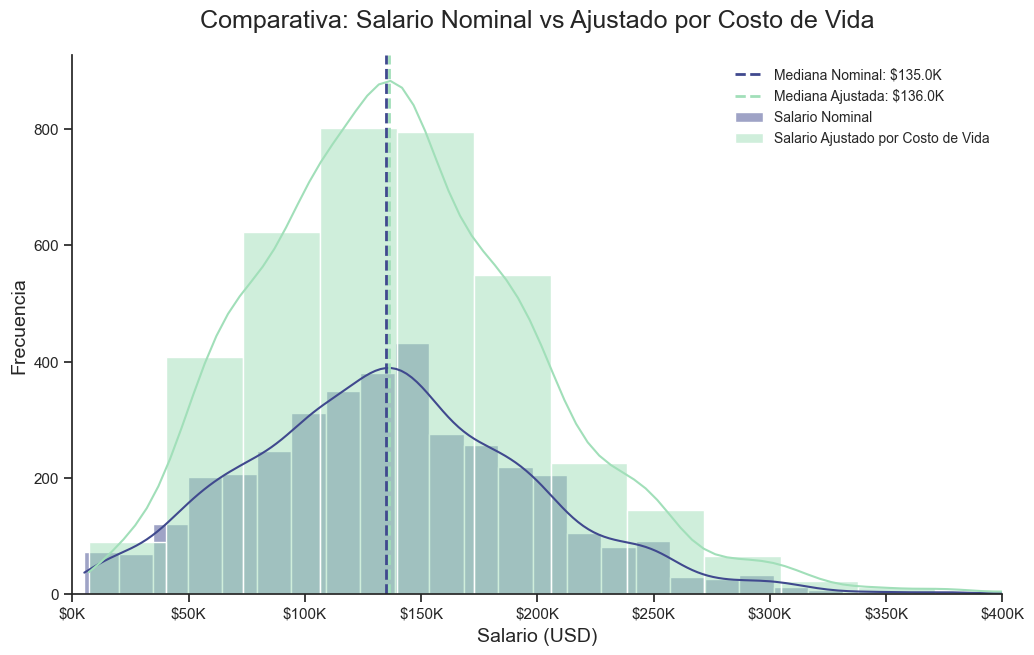

In [14]:
# -----------------------
# 8. Distribución de salario ajustado por costo de vida
# -----------------------
fig, ax = plt.subplots(figsize=(12, 7))

# Histogramas comparativos
sns.histplot(df['salary_in_usd'], color=palette3[2], alpha=0.5, 
             label='Salario Nominal', bins=30, kde=True, ax=ax)
sns.histplot(df['adjusted_salary'], color=palette3[7], alpha=0.5, 
             label='Salario Ajustado por Costo de Vida', bins=30, kde=True, ax=ax)

# Estadísticas
nom_median = df['salary_in_usd'].median()
adj_median = df['adjusted_salary'].median()
ax.axvline(nom_median, color=palette3[2], linestyle='--', linewidth=2, 
           label=f'Mediana Nominal: ${nom_median/1000:.1f}K')
ax.axvline(adj_median, color=palette3[7], linestyle='--', linewidth=2, 
           label=f'Mediana Ajustada: ${adj_median/1000:.1f}K')

# Ajustar el límite del eje x
ax.set_xlim(0, 400000)

ax.set_title('Comparativa: Salario Nominal vs Ajustado por Costo de Vida', fontsize=18, pad=20)
ax.set_xlabel('Salario (USD)', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
ax.xaxis.set_major_formatter(salary_formatter)
ax.legend(fontsize=10)

plt.show()

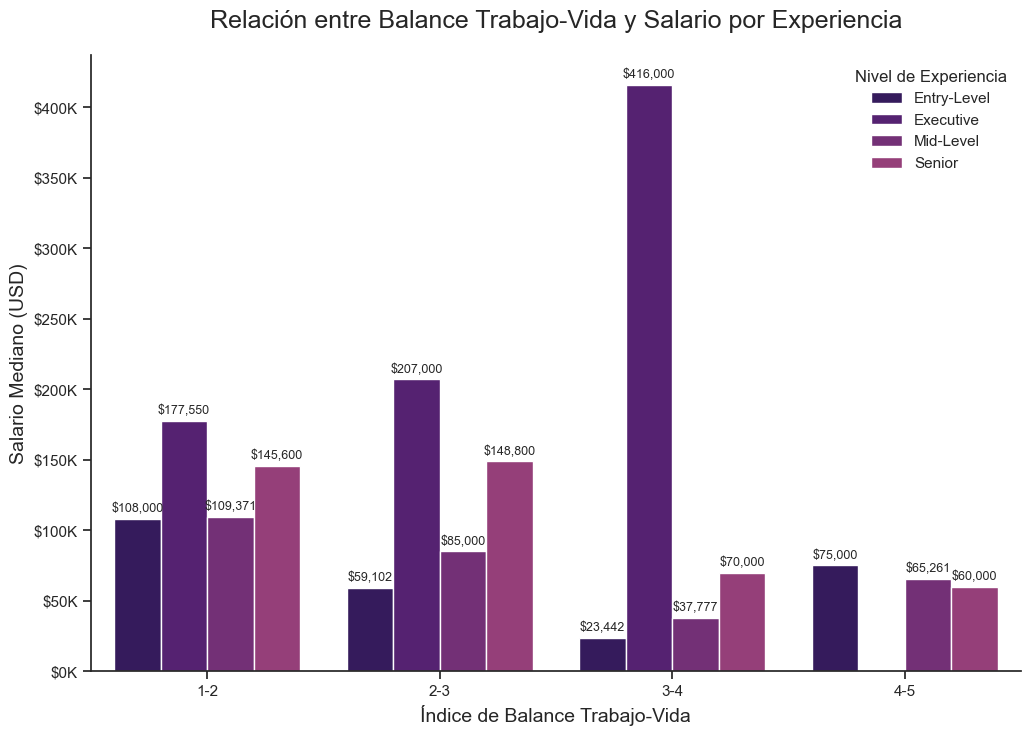

In [15]:
# -----------------------
# 9. Relación entre balance trabajo-vida y salario
# -----------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Agrupar por equilibrio trabajo-vida
df['work_life_bracket'] = pd.cut(df['work_life_balance'], 
                                bins=[1, 2, 3, 4, 5], 
                                labels=['1-2', '2-3', '3-4', '4-5'])

# Datos agrupados
wlb_exp_data = df.groupby(['work_life_bracket', 'experience_level_desc'])['salary_in_usd'].median().reset_index()

# Crear gráfico
sns.barplot(x='work_life_bracket', y='salary_in_usd', hue='experience_level_desc', 
           data=wlb_exp_data, palette=palette2[1:], ax=ax)

# Añadir etiquetas
for container in ax.containers:
    labels = [f"${int(v):,}" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=9)

ax.set_title('Relación entre Balance Trabajo-Vida y Salario por Experiencia', fontsize=18, pad=20)
ax.set_xlabel('Índice de Balance Trabajo-Vida', fontsize=14)
ax.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)
ax.legend(title='Nivel de Experiencia')

plt.show()

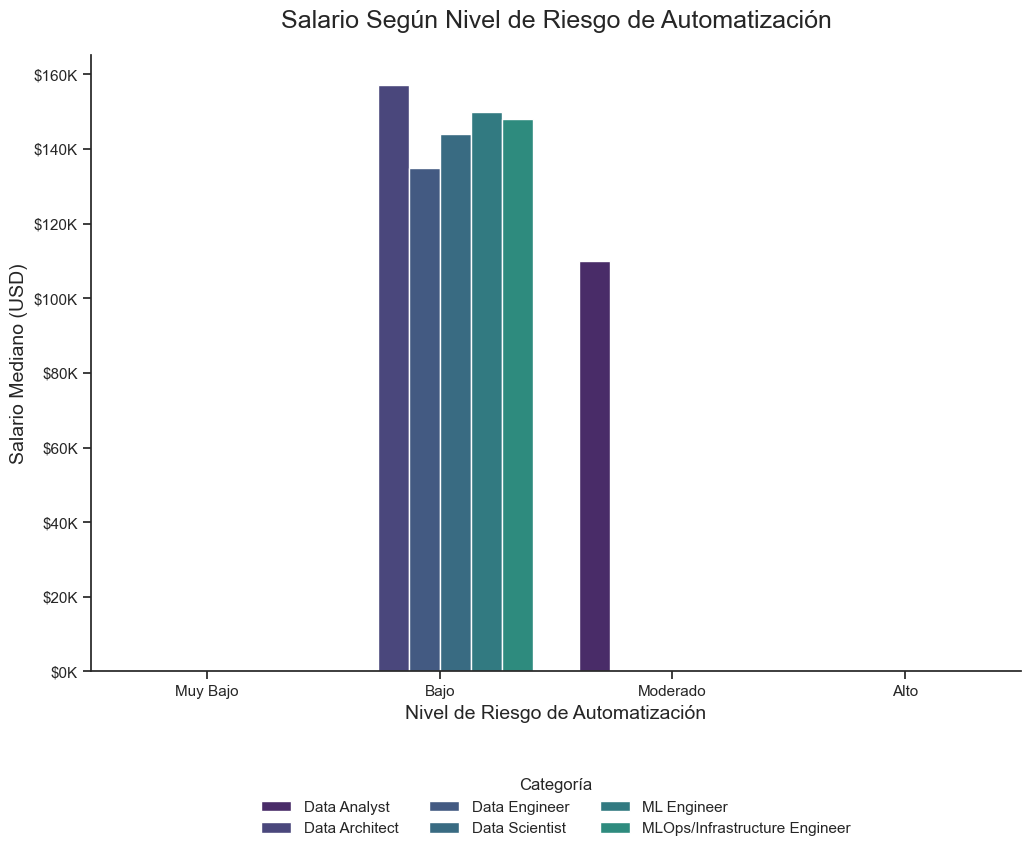

In [16]:
# -----------------------
# 10. Riesgo de automatización vs salario
# -----------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Crear categorías de riesgo
df['automation_risk_bracket'] = pd.cut(df['automation_risk'], 
                                      bins=[0, 2.5, 5, 7.5, 10], 
                                      labels=['Muy Bajo', 'Bajo', 'Moderado', 'Alto'])

# Agrupar por riesgo de automatización y categoría
risk_job_data = df.groupby(['automation_risk_bracket', 'job_category'])['salary_in_usd'].median().reset_index()

# Seleccionar top categorías para mejor visualización
top_jobs = df['job_category'].value_counts().nlargest(6).index
risk_job_data = risk_job_data[risk_job_data['job_category'].isin(top_jobs)]

# Crear gráfico
sns.barplot(x='automation_risk_bracket', y='salary_in_usd', hue='job_category', 
           data=risk_job_data, palette=palette1, ax=ax)

ax.set_title('Salario Según Nivel de Riesgo de Automatización', fontsize=18, pad=20)
ax.set_xlabel('Nivel de Riesgo de Automatización', fontsize=14)
ax.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)
ax.legend(title='Categoría', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

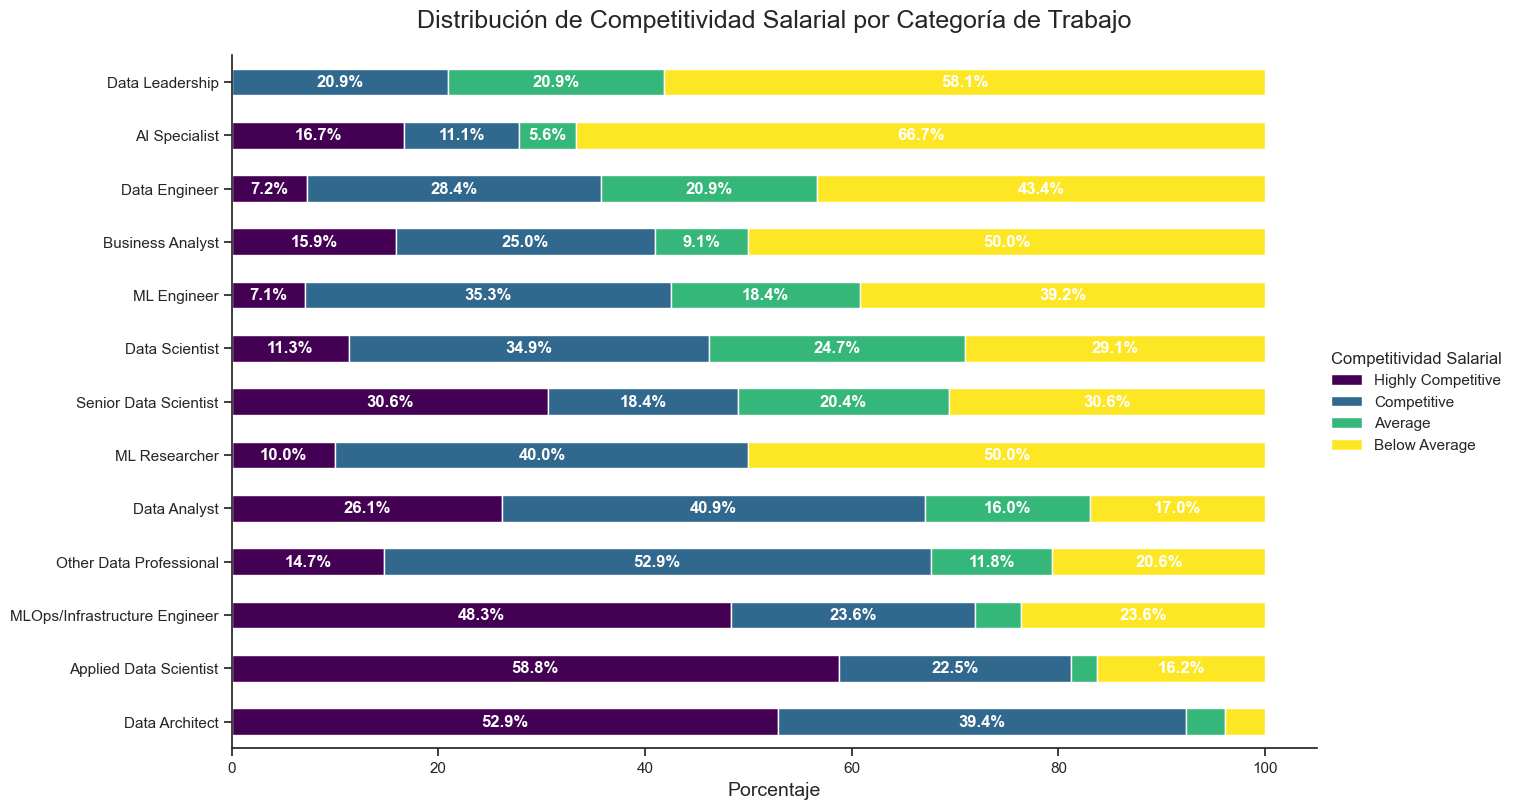

In [17]:
# -----------------------
# 11. Competitividad salarial por categoría
# -----------------------
fig, ax = plt.subplots(figsize=(14, 9))

# Conteo de competitividad salarial por categoría
comp_category_count = df.groupby(['job_category', 'salary_competitiveness']).size().reset_index(name='count')
comp_category_pivot = comp_category_count.pivot(index='job_category', columns='salary_competitiveness', values='count')

# Ordenar por proporciones
comp_category_pivot = comp_category_pivot.fillna(0)
comp_category_pivot['total'] = comp_category_pivot.sum(axis=1)
if 'Highly Competitive' in comp_category_pivot.columns and 'Competitive' in comp_category_pivot.columns:
    comp_category_pivot['high_ratio'] = (comp_category_pivot['Highly Competitive'] + 
                                        comp_category_pivot['Competitive']) / comp_category_pivot['total']
    sorted_index = comp_category_pivot.sort_values('high_ratio', ascending=False).index
    comp_category_pivot = comp_category_pivot.drop(['total', 'high_ratio'], axis=1)
else:
    # Ordenar por total
    comp_category_pivot['total'] = comp_category_pivot.sum(axis=1)
    sorted_index = comp_category_pivot.sort_values('total', ascending=False).index
    comp_category_pivot = comp_category_pivot.drop(['total'], axis=1)

# Asegurar orden adecuado de competitividad
comp_order = ['Highly Competitive', 'Competitive', 'Average', 'Below Average']
comp_category_pivot = comp_category_pivot.reindex(columns=[c for c in comp_order if c in comp_category_pivot.columns])

# Convertir a porcentajes
comp_category_percent = comp_category_pivot.div(comp_category_pivot.sum(axis=1), axis=0) * 100

# Crear gráfico de barras apiladas
comp_category_percent.loc[sorted_index].plot(kind='barh', stacked=True, figsize=(14, 9), 
                                           colormap='viridis', ax=ax)

ax.set_title('Distribución de Competitividad Salarial por Categoría de Trabajo', fontsize=18, pad=20)
ax.set_xlabel('Porcentaje', fontsize=14)
ax.set_ylabel('')
ax.legend(title='Competitividad Salarial', bbox_to_anchor=(1.0, 0.5), loc='center left')

# Añadir etiquetas de porcentaje
for i, rect in enumerate(ax.patches):
    if rect.get_width() > 5:  # Solo mostrar etiquetas para segmentos suficientemente grandes
        ax.text(rect.get_x() + rect.get_width()/2., 
                rect.get_y() + rect.get_height()/2., 
                f'{rect.get_width():.1f}%', 
                ha='center', va='center', color='white', fontweight='bold')
        
plt.show()

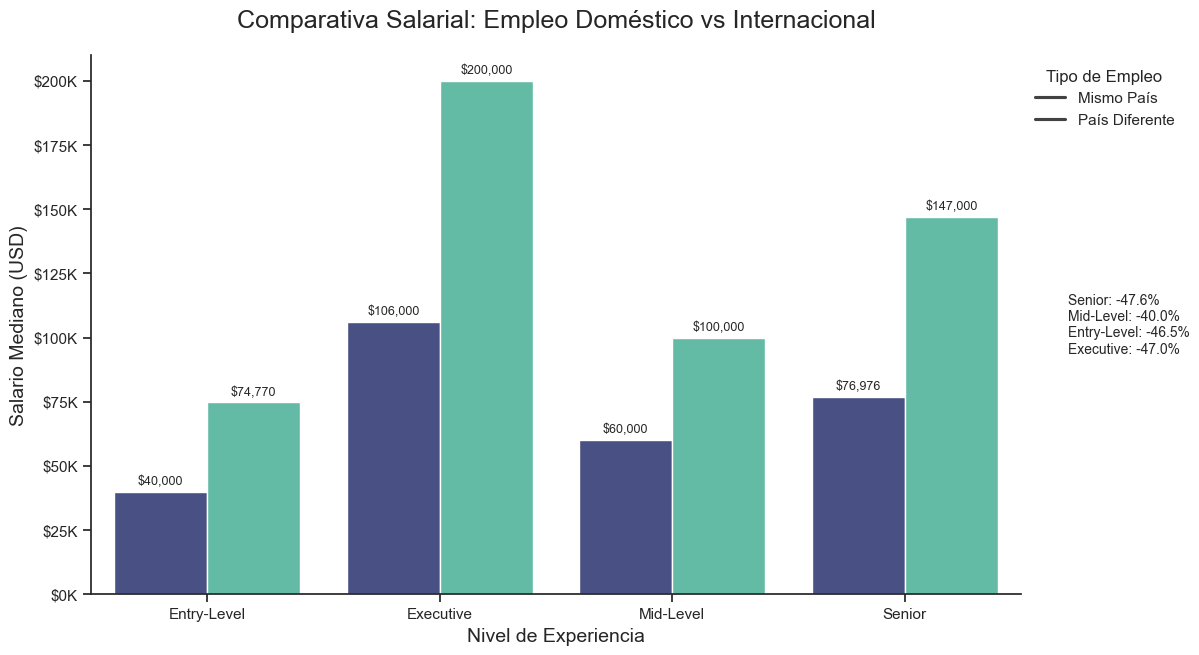

In [18]:
# -----------------------
# 12. Brecha salarial: empleo doméstico vs internacional
# -----------------------
fig, ax = plt.subplots(figsize=(12, 7))

# Agrupar por tipo de empleo (doméstico/internacional) y experiencia
domestic_data = df.groupby(['domestic_employment', 'experience_level_desc'])['salary_in_usd'].median().reset_index()

# Crear gráfico
sns.barplot(x='experience_level_desc', y='salary_in_usd', hue='domestic_employment', 
           data=domestic_data, palette=[palette3[2], palette3[6]], ax=ax)

# Añadir etiquetas
for container in ax.containers:
    labels = [f"${int(v):,}" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=9)

# Calcular porcentajes de diferencia y preparar texto para la leyenda
legend_labels = []
for exp_level in df['experience_level_desc'].unique():
    try:
        domestic = domestic_data[(domestic_data['domestic_employment']==True) & 
                                (domestic_data['experience_level_desc']==exp_level)]['salary_in_usd'].values[0]
        international = domestic_data[(domestic_data['domestic_employment']==False) & 
                                    (domestic_data['experience_level_desc']==exp_level)]['salary_in_usd'].values[0]
        pct_diff = ((international / domestic) - 1) * 100
        legend_labels.append(f"{exp_level}: {'+' if pct_diff > 0 else ''}{pct_diff:.1f}%")
    except:
        legend_labels.append(f"{exp_level}: N/A")

# Mejorar la leyenda
ax.legend(title='Tipo de Empleo', labels=['Mismo País', 'País Diferente'], loc='upper left', bbox_to_anchor=(1, 1))

# Añadir porcentajes a la leyenda
legend_text = '\n'.join(legend_labels)
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))

ax.set_title('Comparativa Salarial: Empleo Doméstico vs Internacional', fontsize=18, pad=20)
ax.set_xlabel('Nivel de Experiencia', fontsize=14)
ax.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)

plt.show()


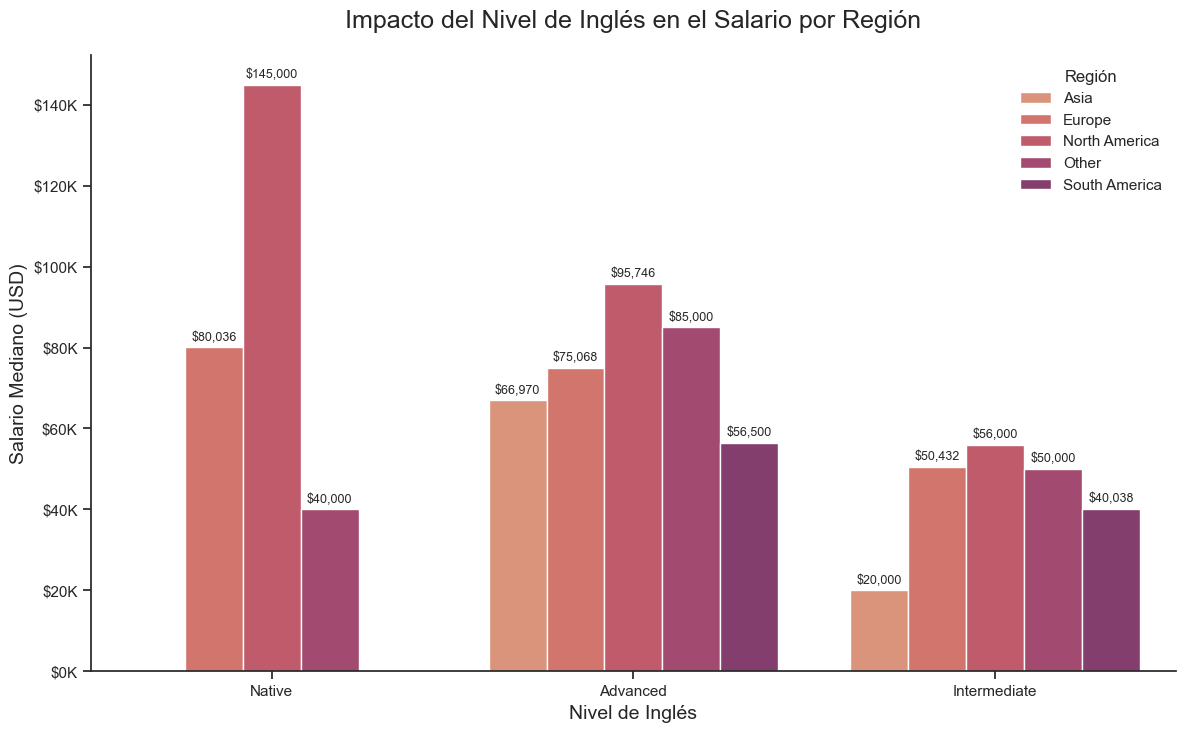

In [19]:
# -----------------------
# 13. Nivel de inglés vs salario por región
# -----------------------
fig, ax = plt.subplots(figsize=(14, 8))

# Agrupar por nivel de inglés y región
english_region_data = df.groupby(['english_level', 'region'])['salary_in_usd'].median().reset_index()

# Ordenar niveles de inglés
english_order = ['Native', 'Advanced', 'Intermediate']
english_region_data['english_level'] = pd.Categorical(
    english_region_data['english_level'], 
    categories=english_order, 
    ordered=True
)

# Filtrar regiones principales para mejor visualización
main_regions = df['region'].value_counts().nlargest(5).index
english_region_data = english_region_data[english_region_data['region'].isin(main_regions)]

# Crear gráfico
sns.barplot(x='english_level', y='salary_in_usd', hue='region', 
           data=english_region_data, palette=palette4, ax=ax)

# Añadir etiquetas
for container in ax.containers:
    labels = [f"${int(v):,}" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=9)

ax.set_title('Impacto del Nivel de Inglés en el Salario por Región', fontsize=18, pad=20)
ax.set_xlabel('Nivel de Inglés', fontsize=14)
ax.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)
ax.legend(title='Región')

plt.show()

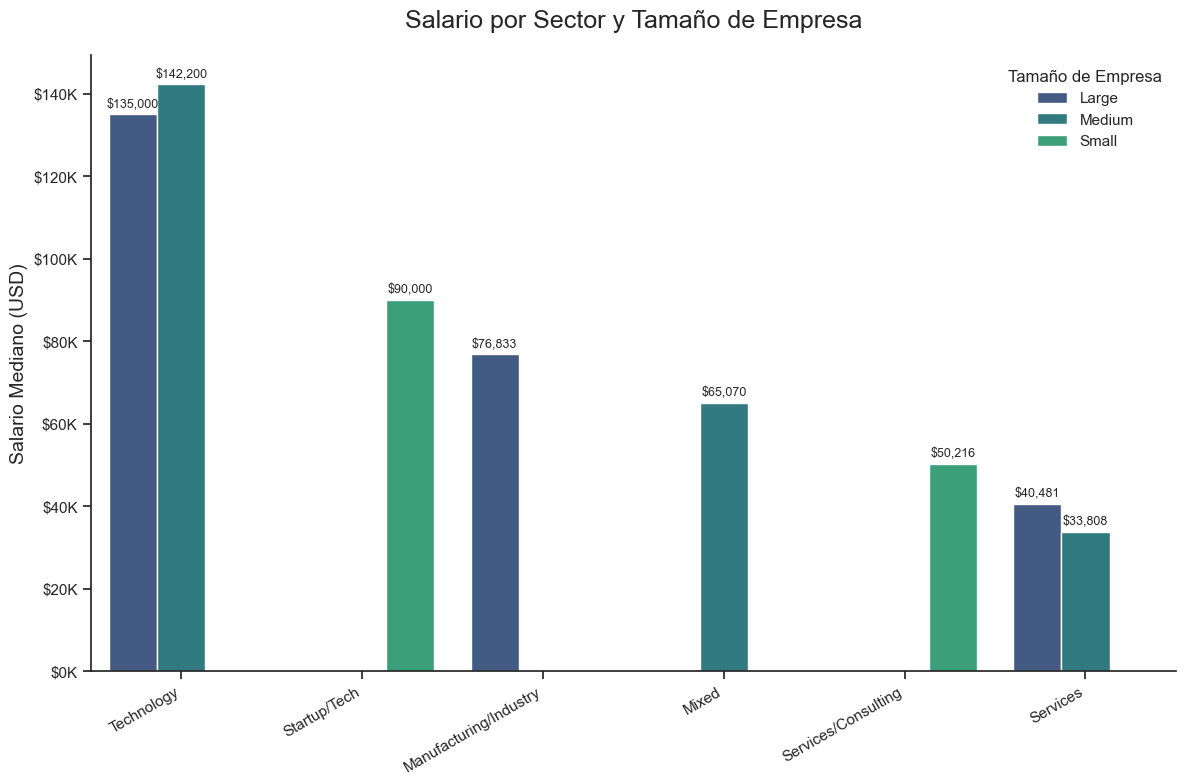

In [20]:
# -----------------------
# 14. Salario por sector de empresa y tamaño
# -----------------------
fig, ax = plt.subplots(figsize=(14, 8))

# Agrupar por sector y tamaño
sector_size_data = df.groupby(['company_sector', 'company_size_desc'])['salary_in_usd'].median().reset_index()

# Ordenar por salario total
sector_order = df.groupby('company_sector')['salary_in_usd'].median().sort_values(ascending=False).index
sector_size_data['company_sector'] = pd.Categorical(
    sector_size_data['company_sector'], 
    categories=sector_order, 
    ordered=True
)

# Gráfico
sns.barplot(x='company_sector', y='salary_in_usd', hue='company_size_desc', 
           data=sector_size_data, palette=palette1[2:8:2], ax=ax)

# Añadir etiquetas
for container in ax.containers:
    labels = [f"${int(v):,}" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=9)

ax.set_title('Salario por Sector y Tamaño de Empresa', fontsize=18, pad=20)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)
ax.legend(title='Tamaño de Empresa')
plt.xticks(rotation=30, ha='right')

plt.show()

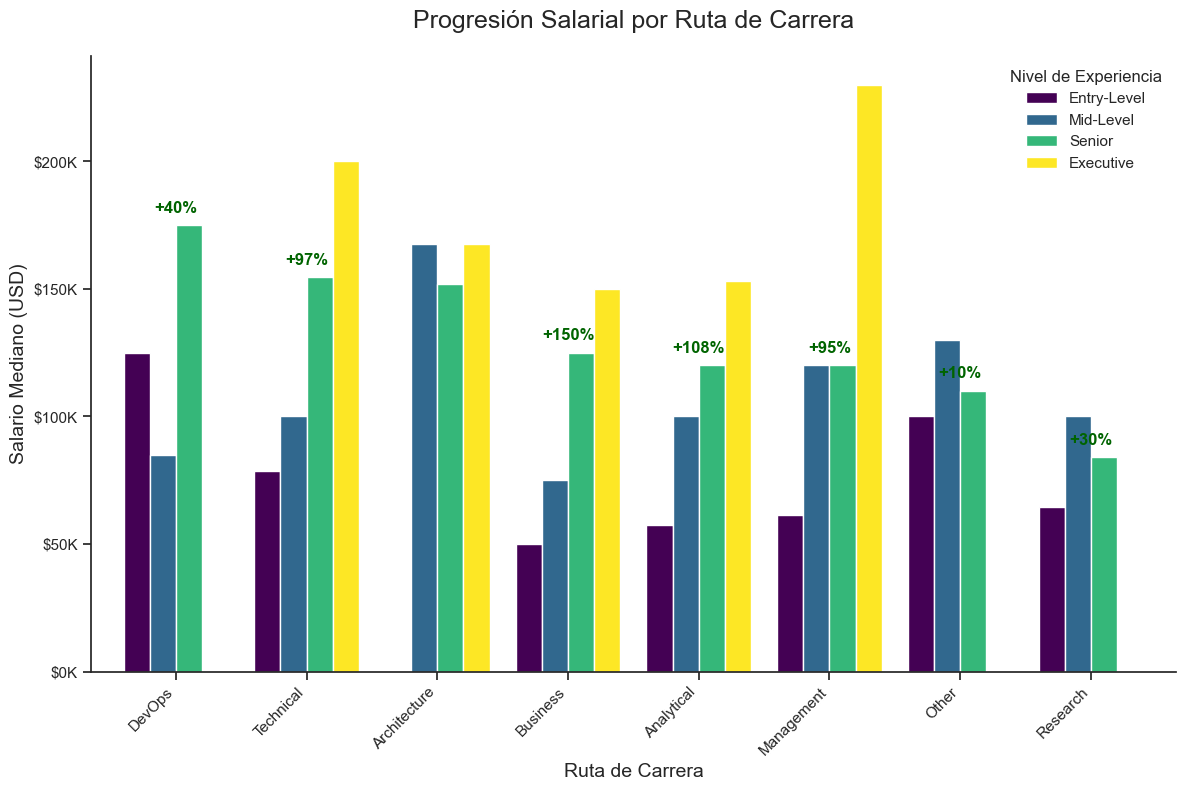

In [21]:
# -----------------------
# 15. Rutas de carrera y su impacto en salarios
# -----------------------
fig, ax = plt.subplots(figsize=(14, 8))

# Agrupar por ruta de carrera y experiencia
career_exp_data = df.groupby(['career_path', 'experience_level_desc'])['salary_in_usd'].median().reset_index()

# Crear pivot para mostrar progresión
career_exp_pivot = career_exp_data.pivot(index='career_path', columns='experience_level_desc', values='salary_in_usd')

# Asegurar orden correcto de experiencia
exp_cols = ['Entry-Level', 'Mid-Level', 'Senior', 'Executive']
career_exp_pivot = career_exp_pivot.reindex(columns=[c for c in exp_cols if c in career_exp_pivot.columns])

# Ordenar por salario senior
if 'Senior' in career_exp_pivot.columns:
    career_exp_pivot = career_exp_pivot.sort_values('Senior', ascending=False)

# Crear gráfico de líneas para mostrar progresión
career_exp_pivot.plot(kind='bar', ax=ax, figsize=(14, 8), width=0.8, colormap='viridis')

ax.set_title('Progresión Salarial por Ruta de Carrera', fontsize=18, pad=20)
ax.set_xlabel('Ruta de Carrera', fontsize=14)
ax.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)
ax.legend(title='Nivel de Experiencia')
plt.xticks(rotation=45, ha='right')

# Añadir tasas de crecimiento como texto
for career in career_exp_pivot.index:
    if 'Entry-Level' in career_exp_pivot.columns and 'Senior' in career_exp_pivot.columns:
        entry = career_exp_pivot.loc[career, 'Entry-Level']
        senior = career_exp_pivot.loc[career, 'Senior']
        if not pd.isna(entry) and not pd.isna(senior) and entry > 0:
            growth = ((senior / entry) - 1) * 100
            # Posición en el eje x
            x_pos = career_exp_pivot.index.get_loc(career)
            ax.text(x_pos, senior + 5000, f"+{growth:.0f}%", 
                   ha='center', color='darkgreen', fontweight='bold')
            
plt.show()

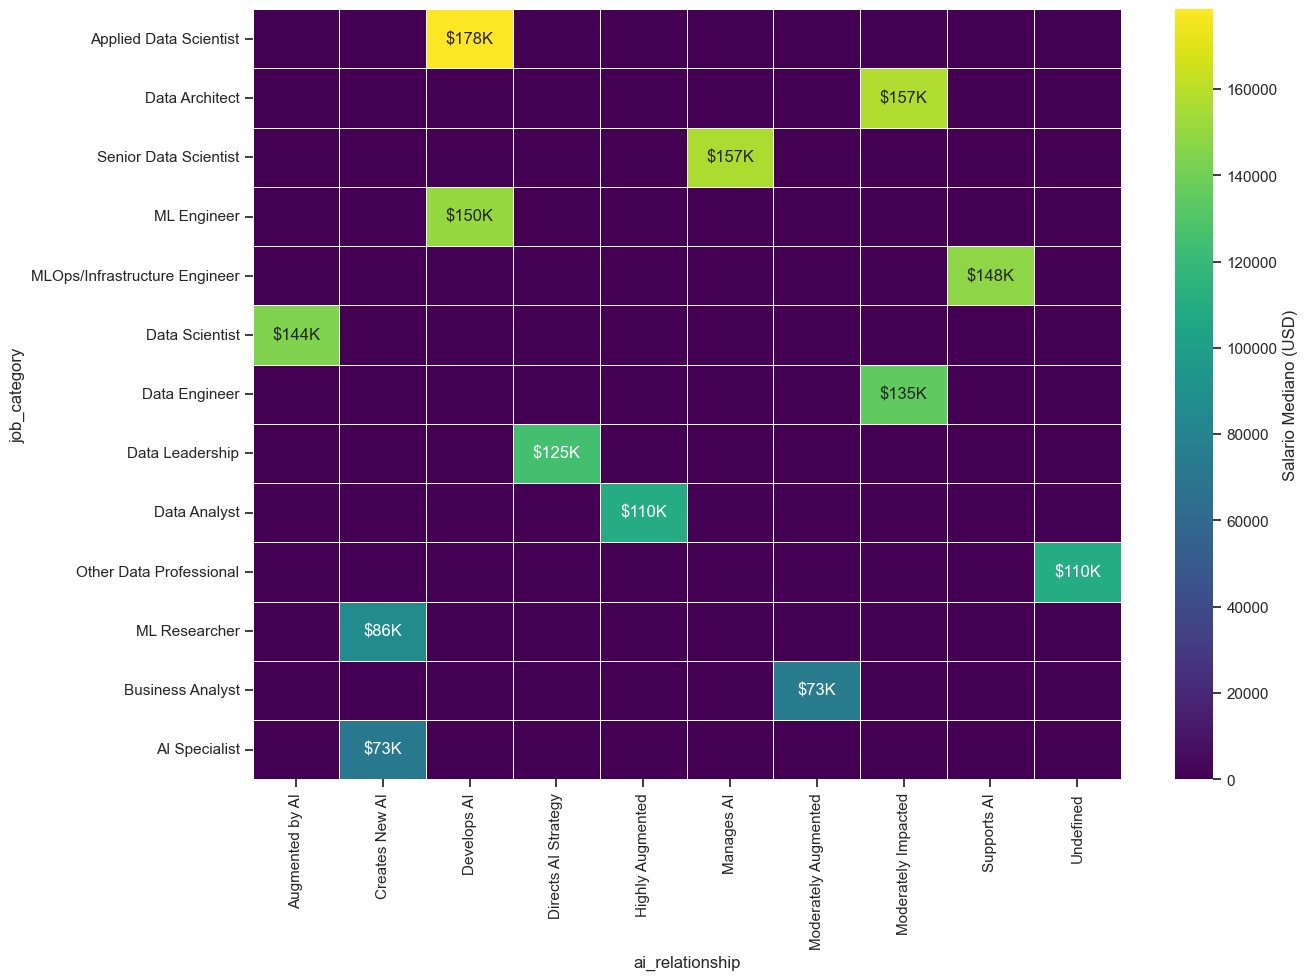

In [22]:
# -----------------------
# 16. Matriz de relación con IA por categoría y salario (CORREGIDO)
# -----------------------
fig, ax = plt.subplots(figsize=(14, 10))

# Agrupar por relación con IA y categoría
ai_job_salary = df.groupby(['ai_relationship', 'job_category'])['salary_in_usd'].median().reset_index()

# Crear pivot table
ai_salary_pivot = ai_job_salary.pivot(index='job_category', columns='ai_relationship', values='salary_in_usd')

# Ordenar por salario total
ai_salary_pivot['total'] = ai_salary_pivot.sum(axis=1)
ai_salary_pivot = ai_salary_pivot.sort_values('total', ascending=False).drop('total', axis=1)

# Rellenar NaN
ai_salary_pivot = ai_salary_pivot.fillna(0)

# Crear heatmap - CORREGIDO usando fmt simple
sns.heatmap(ai_salary_pivot, annot=True, fmt='.0f', cmap='viridis', 
           linewidths=.5, cbar_kws={'label': 'Salario Mediano (USD)'}, ax=ax)

# Formatear anotaciones - CORREGIDO
for text in ax.texts:
    value = float(text.get_text())
    if value > 0:
        text.set_text(f"${value/1000:.0f}K")
    else:
        text.set_text('')

plt.show()

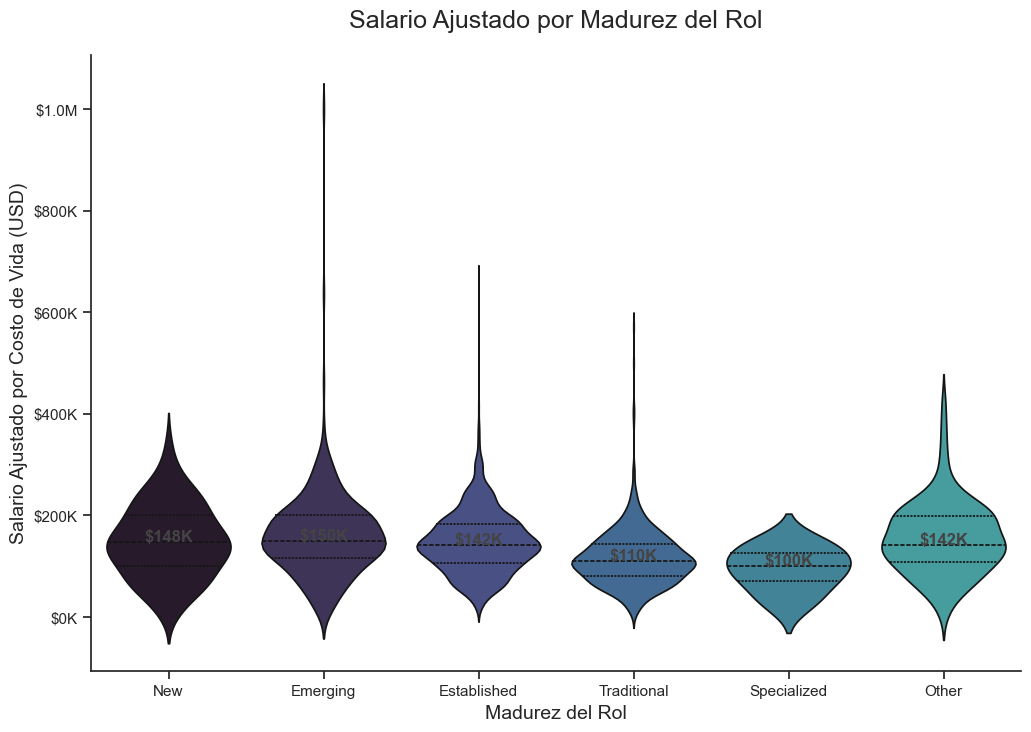

In [23]:
# -----------------------
# 17. Madurez del rol vs salario ajustado
# -----------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Configuración de violines
order = ['New', 'Emerging', 'Established', 'Traditional', 'Specialized', 'Other']
violin = sns.violinplot(x='role_maturity', y='adjusted_salary', data=df, 
                      order=[o for o in order if o in df['role_maturity'].unique()],
                      palette=palette3, inner='quartile', ax=ax)


# Añadir medianas como texto
for i, maturity in enumerate([o for o in order if o in df['role_maturity'].unique()]):
    median_val = df[df['role_maturity'] == maturity]['adjusted_salary'].median()
    ax.text(i, median_val + 10000, f"${median_val/1000:.0f}K", 
            ha='center', va='center', fontweight='bold', color='#444444')

ax.set_title('Salario Ajustado por Madurez del Rol', fontsize=18, pad=20)
ax.set_xlabel('Madurez del Rol', fontsize=14)
ax.set_ylabel('Salario Ajustado por Costo de Vida (USD)', fontsize=14)
ax.yaxis.set_major_formatter(salary_formatter)

plt.show()

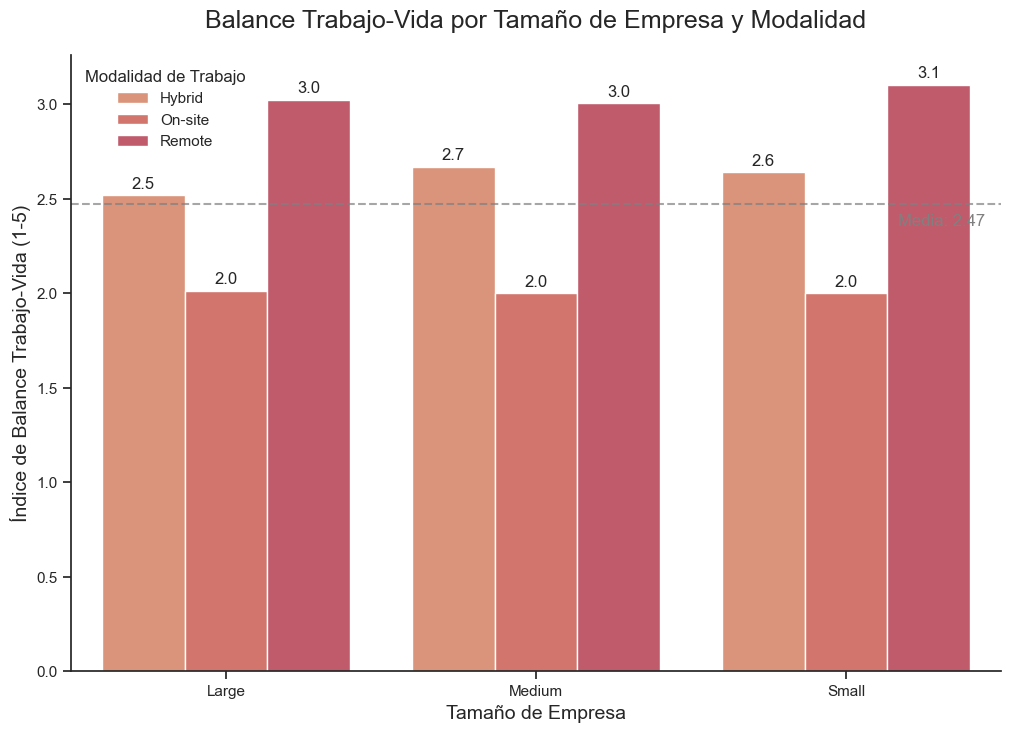

In [24]:
# -----------------------
# 18. Impacto del tamaño de empresa en el balance trabajo-vida
# -----------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Agrupar por tamaño y modalidad
wlb_size_setting = df.groupby(['company_size_desc', 'work_setting'])['work_life_balance'].mean().reset_index()

# Crear gráfico
sns.barplot(x='company_size_desc', y='work_life_balance', hue='work_setting', 
           data=wlb_size_setting, palette=palette4, ax=ax)

# Añadir etiquetas con 1 decimal
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

ax.set_title('Balance Trabajo-Vida por Tamaño de Empresa y Modalidad', fontsize=18, pad=20)
ax.set_xlabel('Tamaño de Empresa', fontsize=14)
ax.set_ylabel('Índice de Balance Trabajo-Vida (1-5)', fontsize=14)
ax.legend(title='Modalidad de Trabajo')

# Añadir línea de referencia para índice medio
mean_wlb = df['work_life_balance'].mean()
ax.axhline(mean_wlb, linestyle='--', color='gray', alpha=0.7)
ax.text(ax.get_xlim()[1] * 0.98, mean_wlb * 0.98, f'Media: {mean_wlb:.2f}', 
        ha='right', va='top', color='gray')

plt.show()

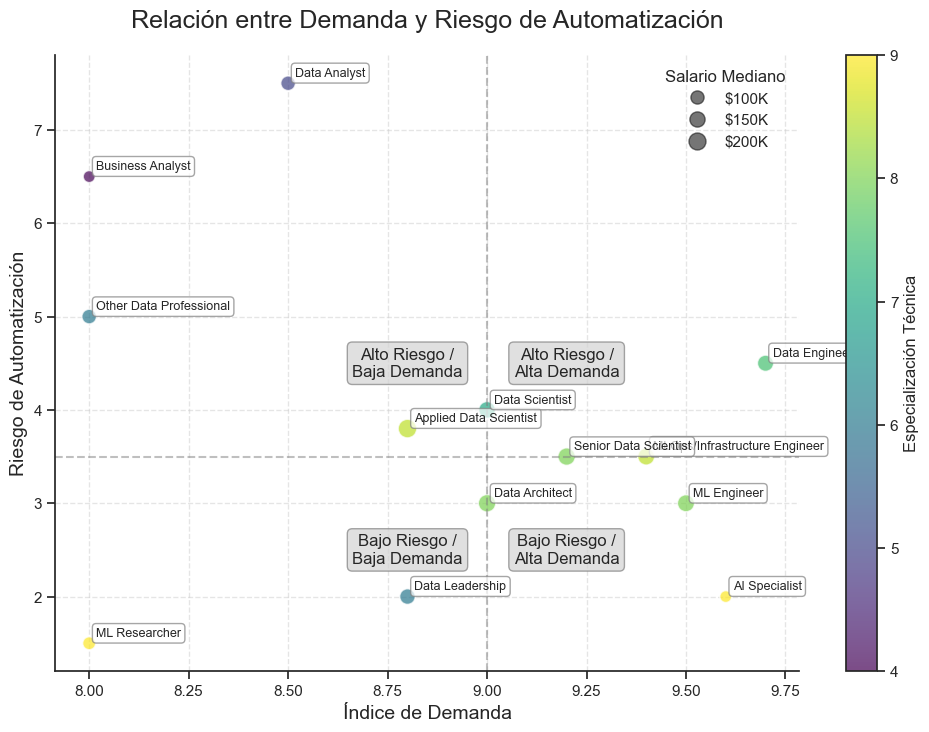

In [25]:
# -----------------------
# 19. Scatter plot: Demanda vs Riesgo de Automatización (CORREGIDO)
# -----------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Agrupar por categoría
bubble_data = df.groupby('job_category').agg({
    'demand_index': 'mean',
    'automation_risk': 'mean',
    'salary_in_usd': 'median',
    'tech_specialization': 'mean'
}).reset_index()

# Crear scatter con burbujas
scatter = ax.scatter(
    bubble_data['demand_index'], 
    bubble_data['automation_risk'],
    s=bubble_data['salary_in_usd'] / 1000,
    c=bubble_data['tech_specialization'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='white',
    linewidth=1
)

# Añadir etiquetas a las burbujas
for i, row in bubble_data.iterrows():
    ax.annotate(
        row['job_category'], 
        (row['demand_index'], row['automation_risk']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
    )

# Dividir el gráfico en cuadrantes
x_middle = bubble_data['demand_index'].median()
y_middle = bubble_data['automation_risk'].median()

ax.axhline(y=y_middle, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=x_middle, color='gray', linestyle='--', alpha=0.5)

# Etiquetar cuadrantes
ax.text(
    x_middle - 0.2, 
    y_middle + 1.0, 
    "Alto Riesgo /\nBaja Demanda", 
    ha='center', 
    va='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="lightgray", ec="gray", alpha=0.7)
)

ax.text(
    x_middle + 0.2, 
    y_middle + 1.0, 
    "Alto Riesgo /\nAlta Demanda", 
    ha='center', 
    va='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="lightgray", ec="gray", alpha=0.7)
)

ax.text(
    x_middle - 0.2, 
    y_middle - 1.0, 
    "Bajo Riesgo /\nBaja Demanda", 
    ha='center', 
    va='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="lightgray", ec="gray", alpha=0.7)
)

ax.text(
    x_middle + 0.2, 
    y_middle - 1.0, 
    "Bajo Riesgo /\nAlta Demanda", 
    ha='center', 
    va='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="lightgray", ec="gray", alpha=0.7)
)

ax.set_title('Relación entre Demanda y Riesgo de Automatización', fontsize=18, pad=20)
ax.set_xlabel('Índice de Demanda', fontsize=14)
ax.set_ylabel('Riesgo de Automatización', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)

# CORRECCIÓN: Crear leyenda manual en lugar de procesar las etiquetas matemáticas
handles, _ = scatter.legend_elements(prop="sizes", alpha=0.6, num=4)

# Generar etiquetas directamente
salary_values = [100, 150, 200, 250]  # Valores representativos en miles
custom_labels = [f"${val}K" for val in salary_values]

legend1 = ax.legend(handles, custom_labels, loc="upper right", title="Salario Mediano")

# Añadir barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Especialización Técnica', fontsize=12)

plt.show()

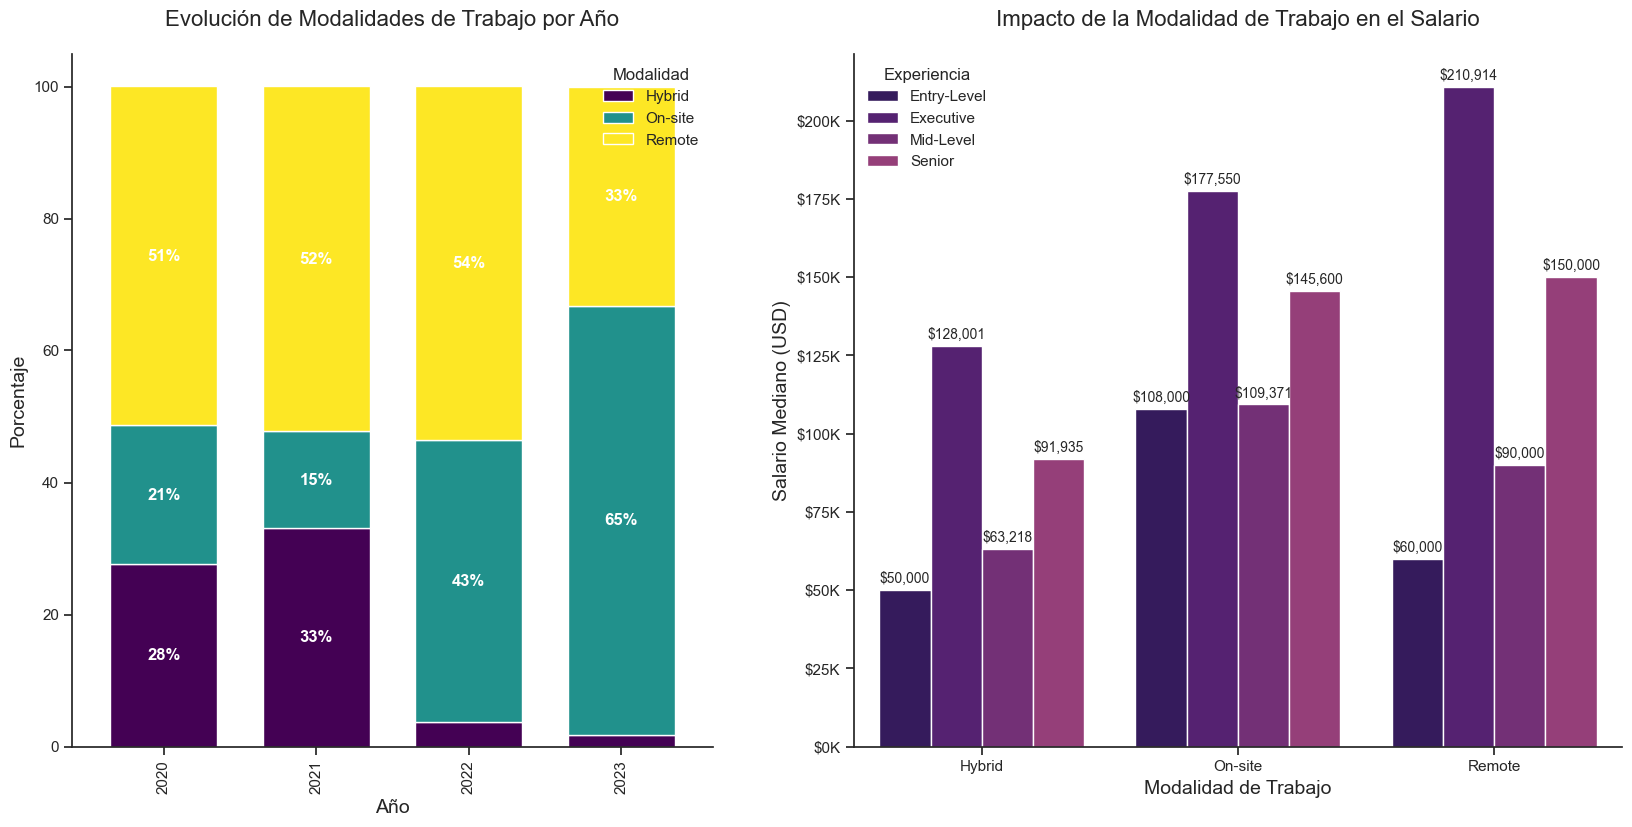

In [26]:
# -----------------------
# 20. Análisis de modalidad de trabajo e impacto en salario (CORREGIDO)
# -----------------------
fig = plt.figure(figsize=(20, 9))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2])

# Primer gráfico: Distribución de modalidades por año
ax1 = plt.subplot(gs[0])
work_year_setting = df.groupby(['work_year', 'work_setting']).size().reset_index(name='count')
work_year_pivot = work_year_setting.pivot(index='work_year', columns='work_setting', values='count')
work_year_pivot = work_year_pivot.fillna(0)

# Convertir a porcentajes
work_year_percent = work_year_pivot.div(work_year_pivot.sum(axis=1), axis=0) * 100

# Crear gráfico
work_year_percent.plot(kind='bar', stacked=True, ax=ax1, 
                     colormap='viridis', width=0.7)

ax1.set_title('Evolución de Modalidades de Trabajo por Año', fontsize=16, pad=20)
ax1.set_xlabel('Año', fontsize=14)
ax1.set_ylabel('Porcentaje', fontsize=14)
ax1.legend(title='Modalidad')

# Añadir etiquetas de porcentaje
for i, rect in enumerate(ax1.patches):
    if rect.get_height() > 10:  # Solo mostrar para segmentos grandes
        ax1.text(rect.get_x() + rect.get_width()/2., 
                rect.get_y() + rect.get_height()/2., 
                f'{rect.get_height():.0f}%', 
                ha='center', va='center', color='white', fontweight='bold')

# Segundo gráfico: Impacto en salario por modalidad y experiencia
ax2 = plt.subplot(gs[1])
work_setting_exp = df.groupby(['work_setting', 'experience_level_desc'])['salary_in_usd'].median().reset_index()

# Desplegar en gráfico
sns.barplot(x='work_setting', y='salary_in_usd', hue='experience_level_desc',
           data=work_setting_exp, palette=palette2[1:], ax=ax2)

# CORREGIDO: Añadir etiquetas usando enfoque de lista personalizada
for container in ax2.containers:
    labels = [f"${int(v):,}" for v in container.datavalues]
    ax2.bar_label(container, labels=labels, padding=3, fontsize=10)

ax2.set_title('Impacto de la Modalidad de Trabajo en el Salario', fontsize=16, pad=20)
ax2.set_xlabel('Modalidad de Trabajo', fontsize=14)
ax2.set_ylabel('Salario Mediano (USD)', fontsize=14)
ax2.yaxis.set_major_formatter(salary_formatter)
ax2.legend(title='Experiencia')

plt.show()